In [14]:
import pandas as pd
import seaborn as sn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [81]:
df=pd.read_csv('https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/labs/python_lab_2901/marketing_customer_analysis_clean.csv')

In [82]:
#separating numericals from the original dataset
df_numerical=df.select_dtypes(include='number')
df_numerical=df_numerical.drop("unnamed:_0", axis=1)
df_numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


## X-y split

In [83]:
X=df_numerical[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception","number_of_open_complaints", "number_of_policies", "month"]]
y=df_numerical[["total_claim_amount"]]

## Train-test split

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=42)

## Standardise the data

In [86]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [87]:
pt=PowerTransformer()

In [88]:
pt.fit(X_train)

PowerTransformer()

In [89]:
X_train=pd.DataFrame(pt.transform(X_train))

In [90]:
df_numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')

In [91]:
X_train=X_train.rename(columns={0:"customer_lifetime_value", 1:"income",2:"monthly_premium_auto", 3:"months_since_last_claim", 4:"months_since_policy_inception", 5:"number_of_open_complaints", 6:"number_of_policies", 7:"total_claim_amount", 8:"month"})

In [92]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,1.718259,0.437732,1.849650,1.663692,-1.585048,-0.579873,-0.062066,1.076494
1,0.520053,0.367024,0.769462,-0.892365,-1.907287,-0.579873,0.516801,-0.928942
2,-1.811323,-1.635871,-0.919372,0.749673,-0.071723,-0.579873,-1.146714,1.076494
3,0.620576,-1.635871,1.087186,-0.180504,0.395589,-0.579873,0.881083,-0.928942
4,-0.263853,-1.635871,-0.770300,1.733481,0.363388,-0.579873,0.516801,-0.928942
...,...,...,...,...,...,...,...,...
8177,-0.749779,-1.635871,0.846161,-0.759945,0.395589,-0.579873,-1.146714,1.076494
8178,-0.747026,0.455124,0.567639,-0.180504,1.184867,-0.579873,-1.146714,-0.928942
8179,0.446565,-1.635871,-0.843508,-1.032843,1.039327,-0.579873,-0.062066,1.076494
8180,-0.273371,-1.635871,-0.770300,0.402854,0.920966,-0.579873,0.516801,1.076494


In [93]:
X_test=pd.DataFrame(pt.transform(X_test))

In [94]:
X_test=X_test.rename(columns={0:"customer_lifetime_value", 1:"income",2:"monthly_premium_auto", 3:"months_since_last_claim", 4:"months_since_policy_inception", 5:"number_of_open_complaints", 6:"number_of_policies", 7:"total_claim_amount", 8:"month"})

In [95]:
X_test

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-0.020145,1.078855,-0.631346,0.492172,1.155965,-0.579873,0.516801,1.076494
1,-1.301598,0.357999,-0.565365,0.136925,-1.422040,1.240860,-1.146714,-0.928942
2,-1.921553,-1.635871,-0.998028,1.593076,0.950724,1.899087,-1.146714,1.076494
3,0.673862,0.878500,1.006120,-0.759945,-0.508087,-0.579873,0.881083,1.076494
4,1.742722,0.851151,-1.343659,-0.076578,-0.703524,-0.579873,-0.062066,1.076494
...,...,...,...,...,...,...,...,...
2723,0.860892,0.733585,1.367391,0.122509,0.709316,-0.579873,1.133271,-0.928942
2724,-1.391718,0.466675,-0.770300,0.913689,0.363388,1.771016,-1.146714,-0.928942
2725,-1.060808,1.024459,-0.108519,0.311578,0.232902,-0.579873,-1.146714,-0.928942
2726,0.493153,-1.635871,-0.380150,-1.996984,1.412627,-0.579873,-0.062066,-0.928942


In [96]:
y_test

,total_claim_amount
4829,475.423848
5081,350.400000
5011,482.400000
4625,673.342650
3838,302.400000
...,...
7450,460.266881
4715,405.883346
8581,41.182611
211,364.800000


In [97]:
y_train

,total_claim_amount
4716,897.600000
8775,504.000000
4754,542.016902
6569,571.200000
1438,504.000000
...,...
5734,777.600000
5191,470.400000
5390,331.200000
860,336.000000


## Apply linear regression

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
model=lr.fit(X_train,y_train)

In [101]:
model.coef_

array([[  11.27408897, -104.03282429,  153.05359257,    3.50607186,
          -3.8577445 ,   -1.41241208,   -7.65954098,   -0.20918495]])

In [102]:
model.intercept_

array([434.60833836])

## Model interpretation

In [103]:
y_pred=pd.DataFrame(model.predict(X_test))

In [104]:
y_pred

,0
0,219.416708
1,309.350176
2,438.170705
3,497.943863
4,163.571252
...,...
2723,567.307518
2724,260.749044
2725,309.452666
2726,541.206748


In [105]:
y_test=y_test.reset_index(drop=True)

In [74]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [75]:
mse(y_test, y_pred)

83145.47549198294

In [76]:
mae(y_test, y_pred)

209.59719356224255

In [78]:
mse(y_test, y_pred, squared=False)

288.34957168683803

# VERSION WITHOUT STANDARTIZATION

In [130]:
df=pd.read_csv('https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/labs/python_lab_2901/marketing_customer_analysis_clean.csv')

In [134]:
#separating numericals from the original dataset
df_numerical_1=df.select_dtypes(include='number')
df_numerical_1

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [140]:
X_1=df_numerical_1[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception","number_of_open_complaints", "number_of_policies", "month"]]
y_1=df_numerical_1[["total_claim_amount"]]

In [141]:
X_train_1, X_test_1, y_train_1, y_test_1=train_test_split(X,y, random_state=42)

In [142]:
model_1=lr.fit(X_train_1,y_train_1)

In [148]:
y_pred_1=pd.DataFrame(model_1.predict(X_test_1))
y_pred_1

,0
0,123.071120
1,350.691128
2,415.785845
3,434.007087
4,155.650319
...,...
2723,588.498884
2724,305.973219
2725,200.930037
2726,454.960213


In [152]:
mse(y_test_1, y_pred_1)

40492.203046744246

In [149]:
mae(y_test_1, y_pred_1)

145.99429616087284

In [151]:
mse(y_test_1, y_pred_1, squared=False)

201.22674535643677

In [154]:
model_1.coef_

array([[-6.21776882e-04, -3.29296570e-03,  5.39085597e+00,
         1.79071863e-01, -1.78513159e-01, -4.98835428e-01,
         2.96686857e-01, -1.82471227e+00]])

In [155]:
model_1.intercept_

array([67.77210531])

# Transorming differently

In [177]:
df=pd.read_csv('https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/labs/python_lab_2901/marketing_customer_analysis_clean.csv')
#separating numericals from the original dataset
df_numerical_2=df.select_dtypes(include='number')
df_numerical_2
X_2=df_numerical_1[["customer_lifetime_value","income","monthly_premium_auto","months_since_last_claim","months_since_policy_inception","number_of_open_complaints", "number_of_policies", "month"]]
y_2=df_numerical_1[["total_claim_amount"]]

In [178]:
X_train_2, X_test_2, y_train_2, y_test_2=train_test_split(X,y, random_state=42)

In [179]:
MMScaler=MinMaxScaler()
SScaler=StandardScaler()

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'month'}>, <Axes: >]], dtype=object)

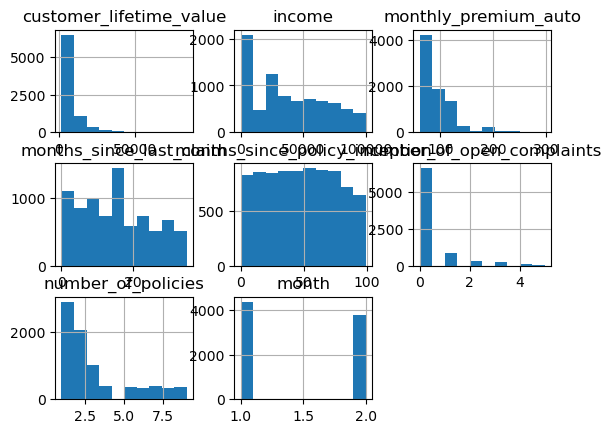

In [180]:
X_train_2.hist()

In [181]:
pt=PowerTransformer()

In [201]:
X_train_2['customer_lifetime_value']=pt.fit_transform(X_train_2[['customer_lifetime_value']])
X_train_2['income']=pt.fit_transform(X_train_2[['income']])
X_train_2['monthly_premium_auto']=pt.fit_transform(X_train_2[['monthly_premium_auto']])
X_train_2['months_since_last_claim']=SScaler.fit_transform(X_train_2[['months_since_last_claim']])
X_train_2['months_since_policy_inception']=SScaler.fit_transform(X_train_2[['months_since_policy_inception']])
X_train_2['number_of_policies']=SScaler.fit_transform(X_train_2[['number_of_policies']])
X_train_2['number_of_open_complaints']=SScaler.fit_transform(X_train_2[['number_of_open_complaints']])
X_train_2['month']=SScaler.fit_transform(X_train_2[['month']])

In [204]:
X_train_2['customer_lifetime_value']=pt.fit(X_train_2[['customer_lifetime_value']])
X_train_2['income']=pt.fit(X_train_2[['income']])
X_train_2['monthly_premium_auto']=pt.fit(X_train_2[['monthly_premium_auto']])
X_train_2['months_since_last_claim']=SScaler.fit(X_train_2[['months_since_last_claim']])
X_train_2['months_since_policy_inception']=SScaler.fit(X_train_2[['months_since_policy_inception']])
X_train_2['number_of_policies']=SScaler.fit(X_train_2[['number_of_policies']])
X_train_2['number_of_open_complaints']=SScaler.fit(X_train_2[['number_of_open_complaints']])
X_train_2['month']=SScaler.fit(X_train_2[['month']])

In [202]:
X_train_2

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
4716,1.709899,0.097216,1.704402,1.935691,-1.463424,-0.43588,-0.406324,1.076494
8775,0.523272,-0.025308,0.801778,-0.943370,-1.642204,-0.43588,0.012015,-0.928942
4754,-1.821300,-1.360701,-0.917405,0.701808,-0.176206,-0.43588,-0.824663,1.076494
6569,0.623201,-1.360701,1.077263,-0.326428,0.324378,-0.43588,0.430354,-0.928942
1438,-0.259568,-1.360701,-0.745815,2.038514,0.288622,-0.43588,0.012015,-0.928942
...,...,...,...,...,...,...,...,...
5734,-0.748146,-1.360701,0.869200,-0.840546,0.324378,-0.43588,-0.824663,1.076494
5191,-0.745372,0.129035,0.621222,-0.326428,1.254036,-0.43588,-0.824663,-0.928942
5390,0.450162,-1.360701,-0.829681,-1.046194,1.075255,-0.43588,-0.406324,1.076494
860,-0.269116,-1.360701,-0.745815,0.290513,0.932231,-0.43588,0.012015,1.076494


In [209]:
pt.fit(X_train_2[['customer_lifetime_value']])
X_test_2['customer_lifetime_value']=pt.transform(X_test_2[['customer_lifetime_value']])

#X_test_2['income']=pt.transform(X_test_2[['income']])
#X_test_2['monthly_premium_auto']=pt.transform(X_test_2[['monthly_premium_auto']])
#X_test_2['months_since_last_claim']=SScaler.transform(X_test_2[['months_since_last_claim']])
#X_test_2['months_since_policy_inception']=SScaler.transform(X_test_2[['months_since_policy_inception']])
#X_test_2['number_of_policies']=SScaler.transform(X_test_2[['number_of_policies']])
#X_test_2['number_of_open_complaints']=SScaler.transform(X_test_2[['number_of_open_complaints']])
#X_test_2['month']=SScaler.transform(X_test_2[['month']])

TypeError: float() argument must be a string or a real number, not 'PowerTransformer'